In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# Import the Reviews Data
raw_reviews = pd.read_csv("turtle_reviews.csv")
print(raw_reviews.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [3]:
# Check for nulls and data types
raw_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Explore the counts, means and variance
raw_reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [5]:
# Delete the unneccessary columns
reviews = raw_reviews.drop(columns=['language']+['platform']).copy()
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


C:\Users\joel\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


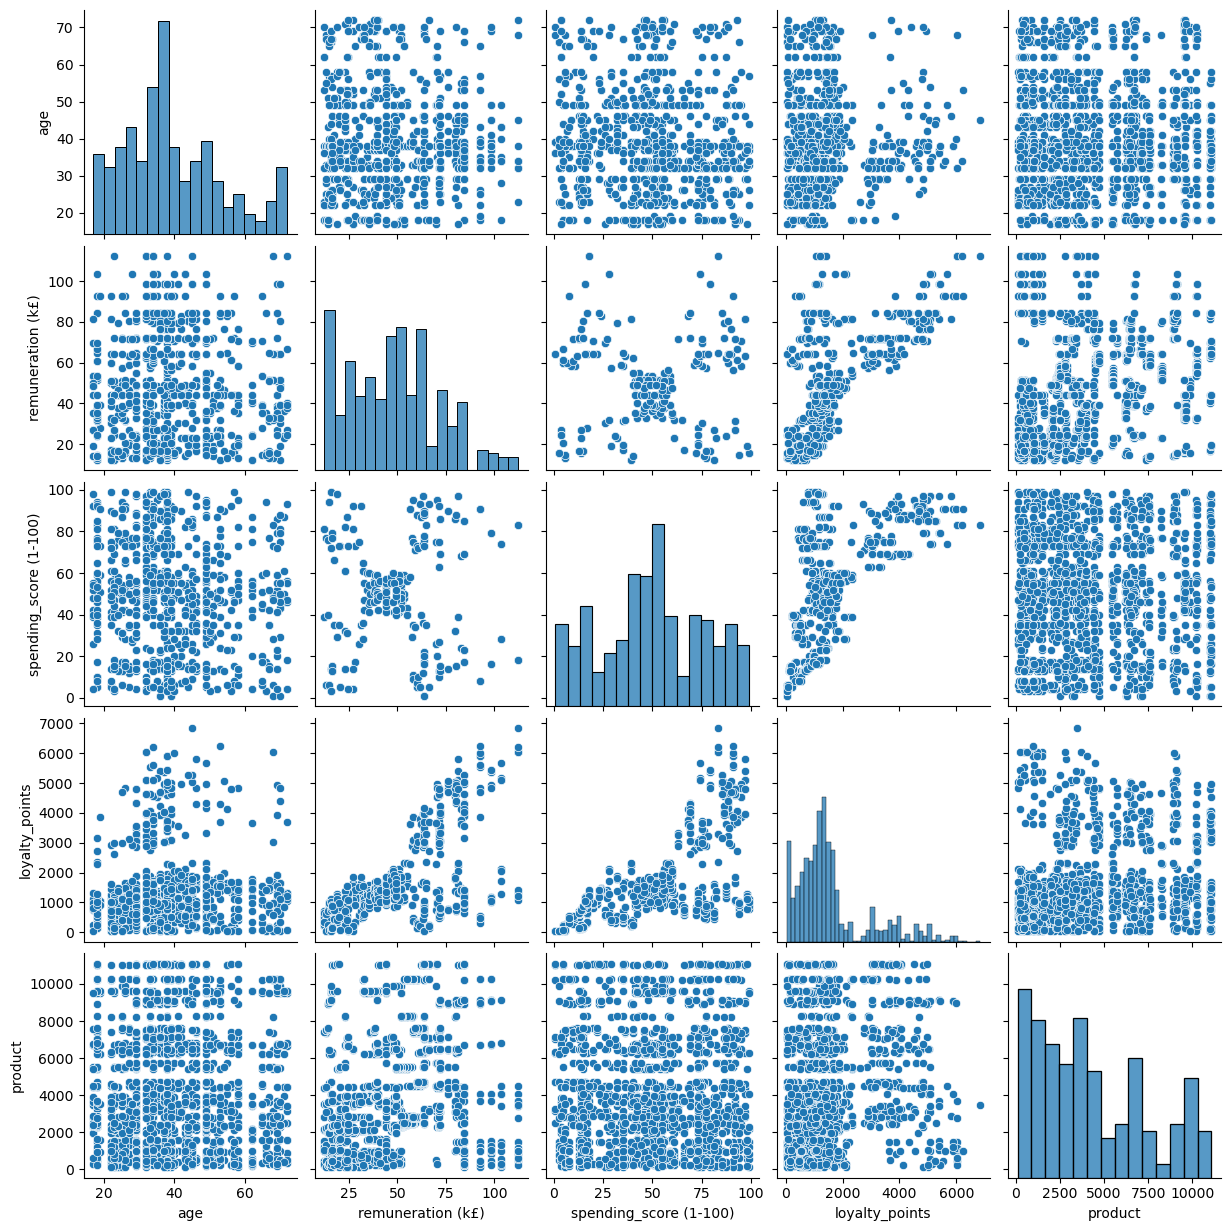

In [6]:
# Plot a pairplot of the reviews data
sns.pairplot(reviews)
plt.show()

In [7]:
# Create data frame to be used for clustering
cluster_df = reviews[['product', 'gender', 'age', 'loyalty_points', 'remuneration (k£)', 'spending_score (1-100)']]
X = cluster_df[['remuneration (k£)', 'spending_score (1-100)']]
X.head()

,remuneration (k£),spending_score (1-100)
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


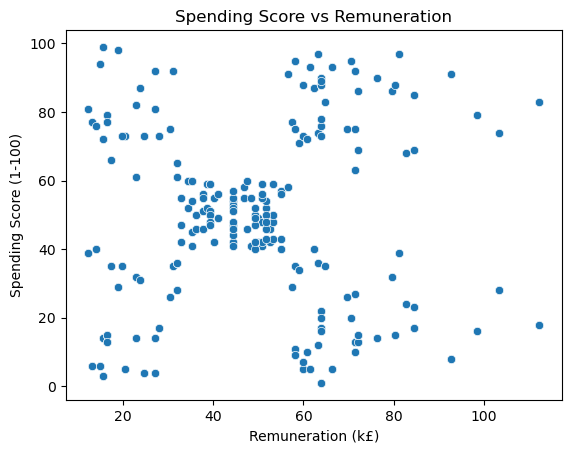

In [8]:
# Plot spending score against remuneration
sns.scatterplot(x = 'remuneration (k£)', y = 'spending_score (1-100)', data = X)
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score vs Remuneration')
plt.show()

In [9]:
# Create Sum of Squares for range 1-10 clusters
wcss = []
for i in range (1,10):
    km = KMeans(n_clusters = i,n_init = 9)
    km.fit(X)
    wcss.append(km.inertia_)
wcss

[2430088.595032798,
 1528052.250275766,
 1006659.3689455048,
 633387.5677305026,
 348507.3568197286,
 302089.19410816656,
 256470.91199200088,
 215647.46391881394,
 182907.74290448154]

<function matplotlib.pyplot.show(close=None, block=None)>

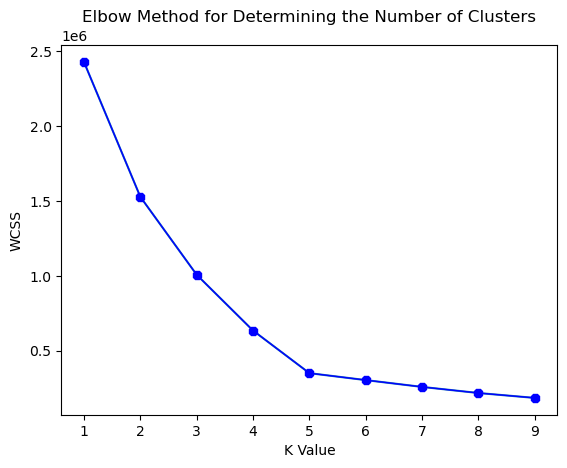

In [10]:
# Plot the elbow curve
plt.plot(range(1,10),wcss)
plt.plot(range(1,10),wcss, linewidth = 1, color = 'blue', marker = '8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,10,1))
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.show

In [12]:
# Fit clusters to data
review_cluster = KMeans(n_clusters = 5, n_init = 10 )
review_cluster.fit(X)

KMeans(n_clusters=5, n_init=10)

In [13]:
# List cluster numbers
y = review_cluster.predict(X)
y

array([3, 4, 3, ..., 2, 1, 1])

In [102]:
# Add cluster/group to the DataFrame
reviews['group'] = y
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary,group
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,3
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,4
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",3
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,4
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,3


<function matplotlib.pyplot.show(close=None, block=None)>

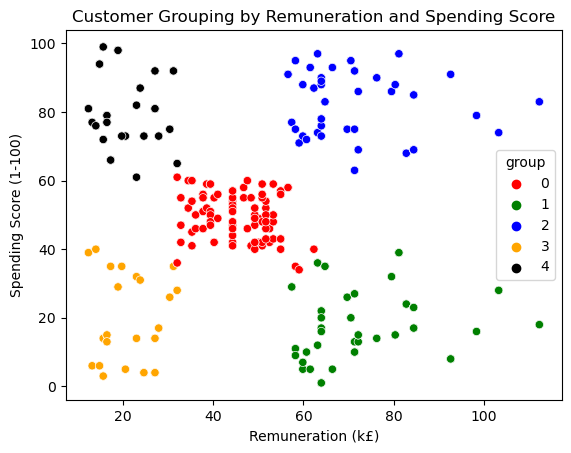

In [15]:
# Create scatterplot showing the clusters
sns.scatterplot(x = 'remuneration (k£)', y = 'spending_score (1-100)', hue = 'group',
              palette = ['red', 'green', 'blue', 'orange', 'black'], legend = 'full', data = reviews)
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Grouping by Remuneration and Spending Score')
plt.show

In [16]:
# Import sales data
raw_sales_data = pd.read_csv("turtle_sales.csv")
raw_sales_data.head()

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,107,Wii,2006.0,Sports,Nintendo,34.02,23.80,67.85
1,2,123,NES,1985.0,Platform,Nintendo,23.85,2.94,33.00
2,3,195,Wii,2008.0,Racing,Nintendo,13.00,10.56,29.37
3,4,231,Wii,2009.0,Sports,Nintendo,12.92,9.03,27.06
4,5,249,GB,1996.0,Role-Playing,Nintendo,9.24,7.29,25.72


In [17]:
# Filter out unneccessary columns
sales_data = raw_sales_data.drop(columns=['Ranking']+['Year']+['NA_Sales']+['EU_Sales']).copy()
sales_data.head()

,Product,Platform,Genre,Publisher,Global_Sales
0,107,Wii,Sports,Nintendo,67.85
1,123,NES,Platform,Nintendo,33.00
2,195,Wii,Racing,Nintendo,29.37
3,231,Wii,Sports,Nintendo,27.06
4,249,GB,Role-Playing,Nintendo,25.72


In [18]:
# Merge sales and reviews data
turtle_data = pd.merge(reviews, sales_data, left_on = 'product', right_on = 'Product')
turtle_data.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary,group,Product,Platform,Genre,Publisher,Global_Sales
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,3,453,GB,Role-Playing,Nintendo,18.94
1,Male,32,112.34,83,6020,PhD,453,Great therapy gap for kids! Some questions can...,Great therapy gap for kids,2,453,GB,Role-Playing,Nintendo,18.94
2,Female,33,92.66,91,5532,graduate,453,I've had my Ball of Whacks for probably 8 year...,Fun for any age,2,453,GB,Role-Playing,Nintendo,18.94
3,Male,38,13.12,6,55,graduate,453,"""A Creativity Tool for Innovators"" is great ma...","great marketingspeak, but it's a lie.",3,453,GB,Role-Playing,Nintendo,18.94
4,Male,38,16.40,13,149,graduate,453,OK,Five Stars,3,453,GB,Role-Playing,Nintendo,18.94


In [35]:
# Sentiment Analysis - Import libraries, including vader as the sentiment analyser
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
# Print head of DataFrame
turtle_data.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary,group,Product,Platform,Genre,Publisher,Global_Sales
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,3,453,GB,Role-Playing,Nintendo,18.94
1,Male,32,112.34,83,6020,PhD,453,Great therapy gap for kids! Some questions can...,Great therapy gap for kids,2,453,GB,Role-Playing,Nintendo,18.94
2,Female,33,92.66,91,5532,graduate,453,I've had my Ball of Whacks for probably 8 year...,Fun for any age,2,453,GB,Role-Playing,Nintendo,18.94
3,Male,38,13.12,6,55,graduate,453,"""A Creativity Tool for Innovators"" is great ma...","great marketingspeak, but it's a lie.",3,453,GB,Role-Playing,Nintendo,18.94
4,Male,38,16.40,13,149,graduate,453,OK,Five Stars,3,453,GB,Role-Playing,Nintendo,18.94


In [37]:
# Remove stop words
stop_words = set(stopwords.words('english'))

In [38]:
# Set up analyzer
analyzer = SentimentIntensityAnalyzer()

In [52]:
# Pull first review - test analyser
text = turtle_data['review'][0]
text

"When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely."

In [53]:
# First Review - test analyser
sentences = sent_tokenize(text)
sentences

["When it comes to a DM's screen, the space on the screen itself is at an absolute premium.",
 'The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless.',
 'The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls.',
 'Other than that, it drops the ball completely.']

In [54]:
# First Review - test analyser
words = [word.lower() for sentence in sentences for word in word_tokenize(sentence) if word.isalnum()]
words

['when',
 'it',
 'comes',
 'to',
 'a',
 'dm',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely']

In [55]:
# First Review - test analyser
words = [word for word in words if word not in stop_words]
words

['comes',
 'dm',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely']

In [56]:
# First Review - test analyser
sentiment_scores = analyzer.polarity_scores(text)
sentiment_scores

{'neg': 0.109, 'neu': 0.856, 'pos': 0.035, 'compound': -0.7406}

In [59]:
# First Review - test analyser
sentiment_label = 'positive' if sentiment_scores['compound'] > 0 else 'negative' if sentiment_scores['compound'] < 0 else 'netural'
sentiment_label

'negative'

In [61]:
# First Review - test analyser
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
lemmatized_words

['come',
 'dm',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'make',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'star',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'note',
 'dice',
 'roll',
 'drop',
 'ball',
 'completely']

In [62]:
# First Review - test analyser
freq_dist = FreqDist(lemmatized_words)
freq_dist

FreqDist({'screen': 2, 'space': 2, 'art': 2, 'completely': 2, 'come': 1, 'dm': 1, 'absolute': 1, 'premium': 1, 'fact': 1, '50': 1, ...})

In [113]:
# Assign empty lists
sentiment_labels = []
lemmatized_words_list = []
sentiment_scores = []

In [114]:
# For loop - sentiment analysis on whole DataFrame
for i in range(0,len(turtle_data)):
    text = turtle_data['review'][i]

    sentences = sent_tokenize(text)

    words = [word.lower() for sentence in sentences for word in word_tokenize(sentence) if word.isalnum()]

    words = [word for word in words if word not in stop_words]

    sentiment_scores_ = analyzer.polarity_scores(text)

    sentiment_label = 'positive' if sentiment_scores_['compound'] > 0 else 'negative' if sentiment_scores_['compound'] < 0 else 'netural'
    sentiment_labels.append(sentiment_label)
    sentiment_scores.append(sentiment_scores_['compound'])
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_words_list.extend(lemmatized_words)

    freq_dist = FreqDist(lemmatized_words)

In [115]:
# Add sentiment scores and labels to the DataFrame
turtle_data['sentiment_label'] = sentiment_labels
turtle_data['sentiment_score'] = sentiment_scores
turtle_data.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary,group,Product,Platform,Genre,Publisher,Global_Sales,sentiment_label,sentiment_score
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,3,453,GB,Role-Playing,Nintendo,18.94,negative,-0.7406
1,Male,32,112.34,83,6020,PhD,453,Great therapy gap for kids! Some questions can...,Great therapy gap for kids,2,453,GB,Role-Playing,Nintendo,18.94,positive,0.8684
2,Female,33,92.66,91,5532,graduate,453,I've had my Ball of Whacks for probably 8 year...,Fun for any age,2,453,GB,Role-Playing,Nintendo,18.94,positive,0.9127
3,Male,38,13.12,6,55,graduate,453,"""A Creativity Tool for Innovators"" is great ma...","great marketingspeak, but it's a lie.",3,453,GB,Role-Playing,Nintendo,18.94,positive,0.9463
4,Male,38,16.40,13,149,graduate,453,OK,Five Stars,3,453,GB,Role-Playing,Nintendo,18.94,positive,0.2960


<function matplotlib.pyplot.show(close=None, block=None)>

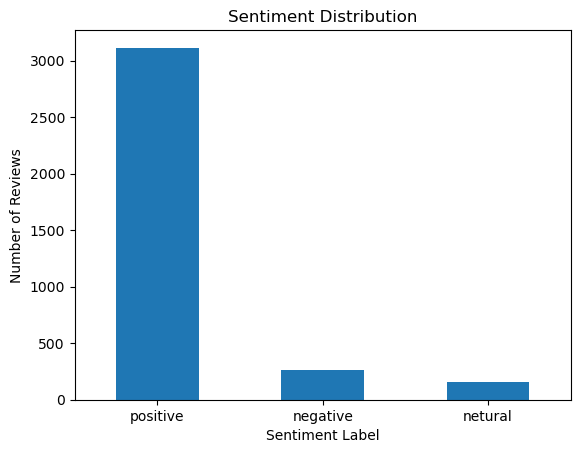

In [90]:
# Plot number of positive, negtive and neutral reviews
pd.Series(turtle_data['sentiment_label']).value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show

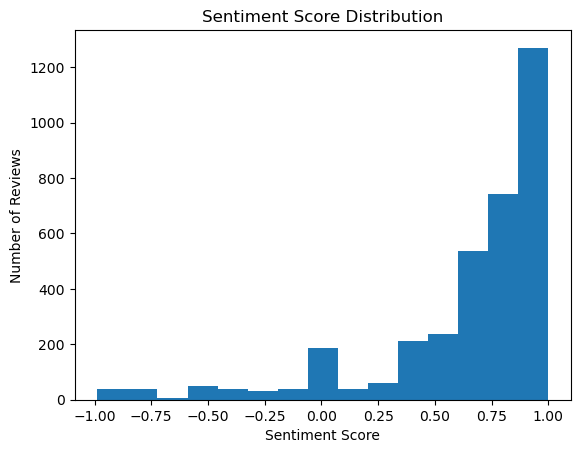

In [116]:
# Histogram showing sentiment score by number of reviews
plt.hist(turtle_data['sentiment_score'], bins=15)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Score Distribution')
plt.show()

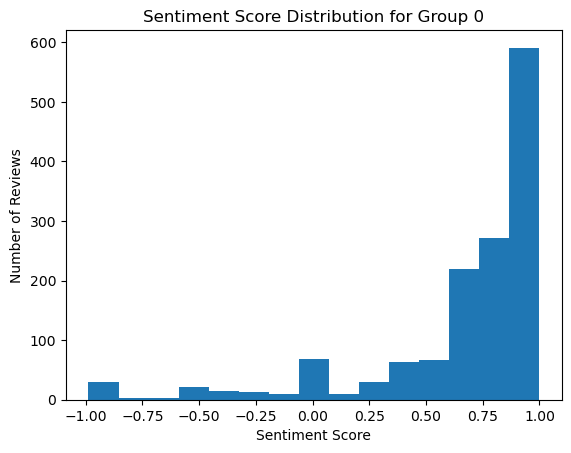

In [117]:
# Group 0 reviews data
group_0_reviews = turtle_data.loc[turtle_data['group'] == 0]
# Histogram showing sentiment score by number of reviews
plt.hist(group_0_reviews['sentiment_score'], bins=15)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Score Distribution for Group 0')
plt.show()

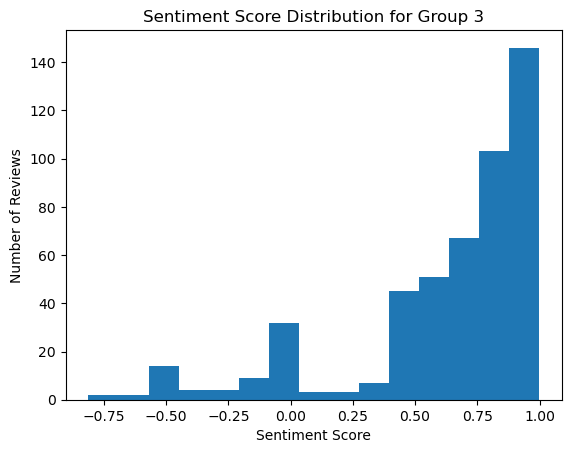

In [128]:
# Group 3 reviews data
group_3_reviews = turtle_data.loc[turtle_data['group'] == 3]
# Histogram showing sentiment score by number of reviews
plt.hist(group_3_reviews['sentiment_score'], bins=15)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Score Distribution for Group 3')
plt.show()

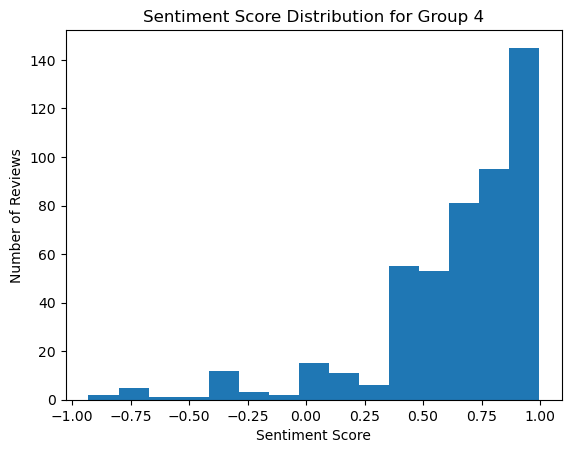

In [127]:
# Group 4 reviews data
group_4_reviews = turtle_data.loc[turtle_data['group'] == 4]
# Histogram showing sentiment score by number of reviews
plt.hist(group_4_reviews['sentiment_score'], bins=15)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Score Distribution for Group 4')
plt.show()

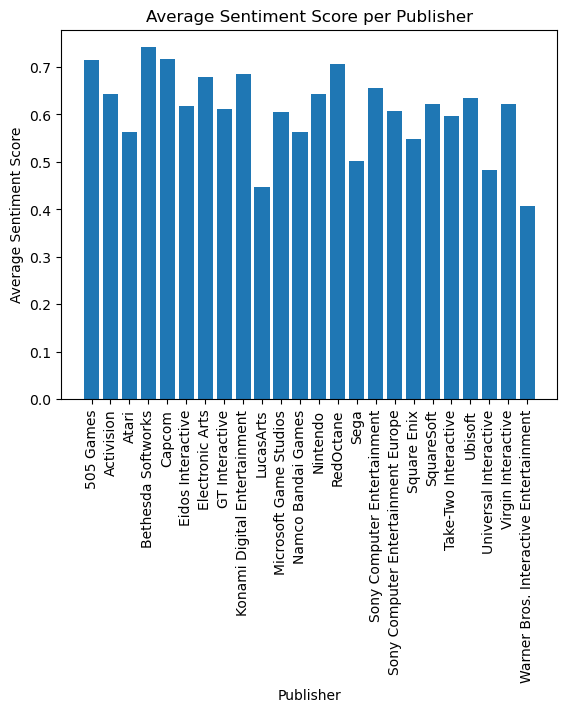

In [133]:
# Group by publisher
sentiment_publisher = turtle_data.groupby('Publisher')['sentiment_score'].mean().reset_index()
# Plot graph of average sentiment score by publisher
plt.bar(x = sentiment_publisher['Publisher'], height = sentiment_publisher['sentiment_score'])
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Publisher')
plt.xticks(rotation=90)
plt.show()

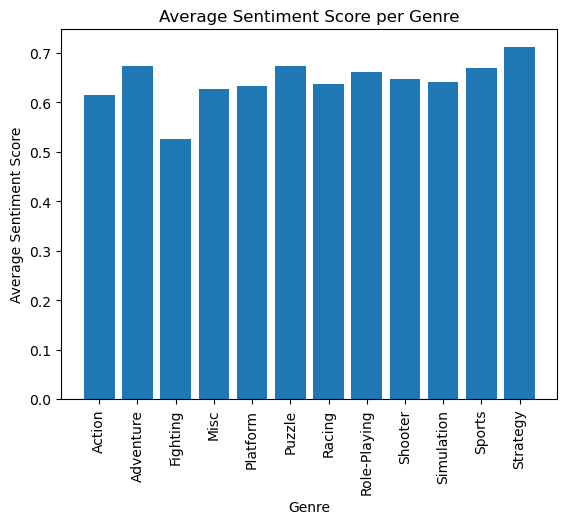

In [143]:
# Group by genre
sentiment_genre = turtle_data.groupby('Genre')['sentiment_score'].mean().reset_index()
# Plot graph of average sentiment score by genre
plt.bar(x = sentiment_genre['Genre'], height = sentiment_genre['sentiment_score'])
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Genre')
plt.xticks(rotation=90)
plt.show()

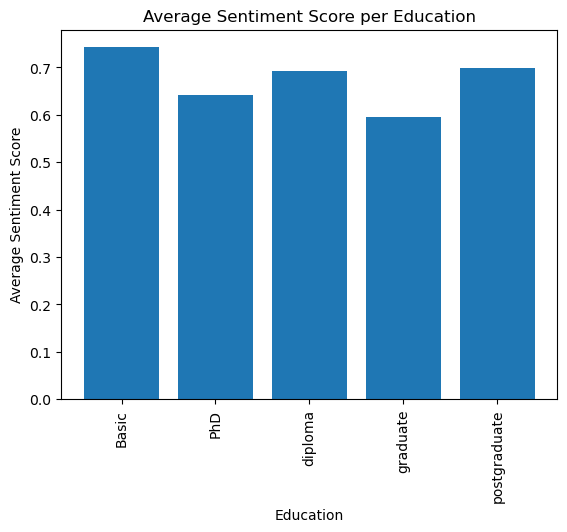

In [145]:
# Group by education
sentiment_education = turtle_data.groupby('education')['sentiment_score'].mean().reset_index()
# Plot graph of average sentiment score by education
plt.bar(x = sentiment_education['education'], height = sentiment_education['sentiment_score'])
plt.xlabel('Education')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Education')
plt.xticks(rotation=90)
plt.show()

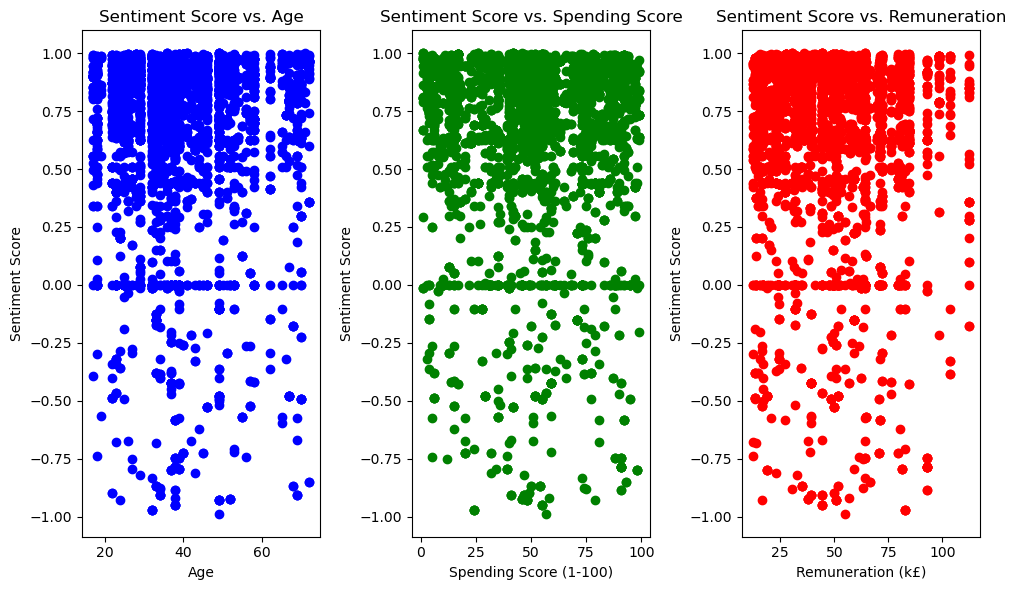

In [149]:
# Plotting Sentiment Score against age, remuneration and spending score
plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)
plt.scatter(turtle_data['age'], turtle_data['sentiment_score'], marker='o', color='b')
plt.xlabel('Age')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs. Age')

# Line graph for sentiment_score vs. spending_score
plt.subplot(1, 3, 2)
plt.scatter(turtle_data['spending_score (1-100)'], turtle_data['sentiment_score'], marker='o', color='g')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs. Spending Score')

# Line graph for sentiment_score vs. remuneration
plt.subplot(1, 3, 3)
plt.scatter(turtle_data['remuneration (k£)'], turtle_data['sentiment_score'], marker='o', color='r')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs. Remuneration')

plt.tight_layout()
plt.show()

In [150]:
# Create new DataFrame with reviews and sentiment scores
# review_scores = turtle_data[['review', 'sentiment_score']].copy()
# Top 20 Positive Reviews
# review_scores.sort_values(by=['sentiment_score'], ascending=False).head(20)

In [151]:
# Top 20 Negative Reviews
#review_scores.sort_values(by=['sentiment_score'], ascending=True).head(20)

<function matplotlib.pyplot.show(close=None, block=None)>

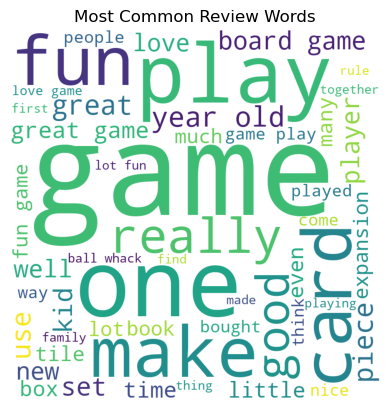

In [92]:
# Produce word cloud with most commonly used words
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 50).generate(" ".join(lemmatized_words_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Common Review Words')
plt.show